# The Impact of Remote Work on Employee Productivity

![Banner](./assets/banner.jpeg)

In [70]:
#Imports

import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score


## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->
I want to aim to undertsand how remote work has impacted employees especially after COVID-19. More and more companies are becoming remote so I want to show how these changes to beoming remote impact employees in a good way or bad way. 

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->
1. How has remote work affected employees personal life? 
2. What are some of the benefits of remote work? As well as the negativies?
3. How has remote work affected employee productivity?
4. How has remote work improved or worsened employee mental health? 

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->
1. Remote work has affected employees personal lives in a postitive way becuase it allows them to spend more time at homw with their families. 
2. Some benefits of remote work are that it allows employees to have a better work life balance. Some negatives are that it can be hard to communicate with coworkers.
3. Remote work affects the productivity of employees becuase it allows them to work in a comfortable environment and at their own pace. 
4. Remote work has improved employees mental health becuase it has allowed them to be comfortable when working. 

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->
Remote work prodcutivity dataset, remote work mental health dataset, remote work vs in person csv 

kaggle kernels pull alaaabdelstar/remote-work-productivity
kaggle kernels pull alaaabdelstar/remote-work-productivity-mental-health

In [71]:


# Download latest version
path = kagglehub.dataset_download("waqi786/remote-work-and-mental-health")
path1 = kagglehub.dataset_download("mrsimple07/remote-work-productivity")
def load_csv_data():
    file_path = r"C:\Users\simra\OneDrive - University of Cincinnati\UC\Data Tech Analytics\remote-work-productivity_exported.csv"
print("Path to dataset files:", path)
print("Path to dataset files:", path1)

Path to dataset files: C:\Users\simra\.cache\kagglehub\datasets\waqi786\remote-work-and-mental-health\versions\1
Path to dataset files: C:\Users\simra\.cache\kagglehub\datasets\mrsimple07\remote-work-productivity\versions\1


## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->
I want to use the databasees to show how productivity has increased over the years due to remote work especially after COVID-19. I also want to show stats about how mental health has increased or decreased becuase of remote work 
using the data, i can then make a conlcusions about how remote work has improved or worsened over the years and how it has affected employees work and personal life. 
I want to merge the two datasets of productivity and mental health by using the well being score and the stree level to find out the different levels of stress. 


Data Cleaning and Tranformation
- Missing Values
- Duplicate Values 
- Anomlies and Outliers 
- Data Types Transformation 

Mental Health Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 

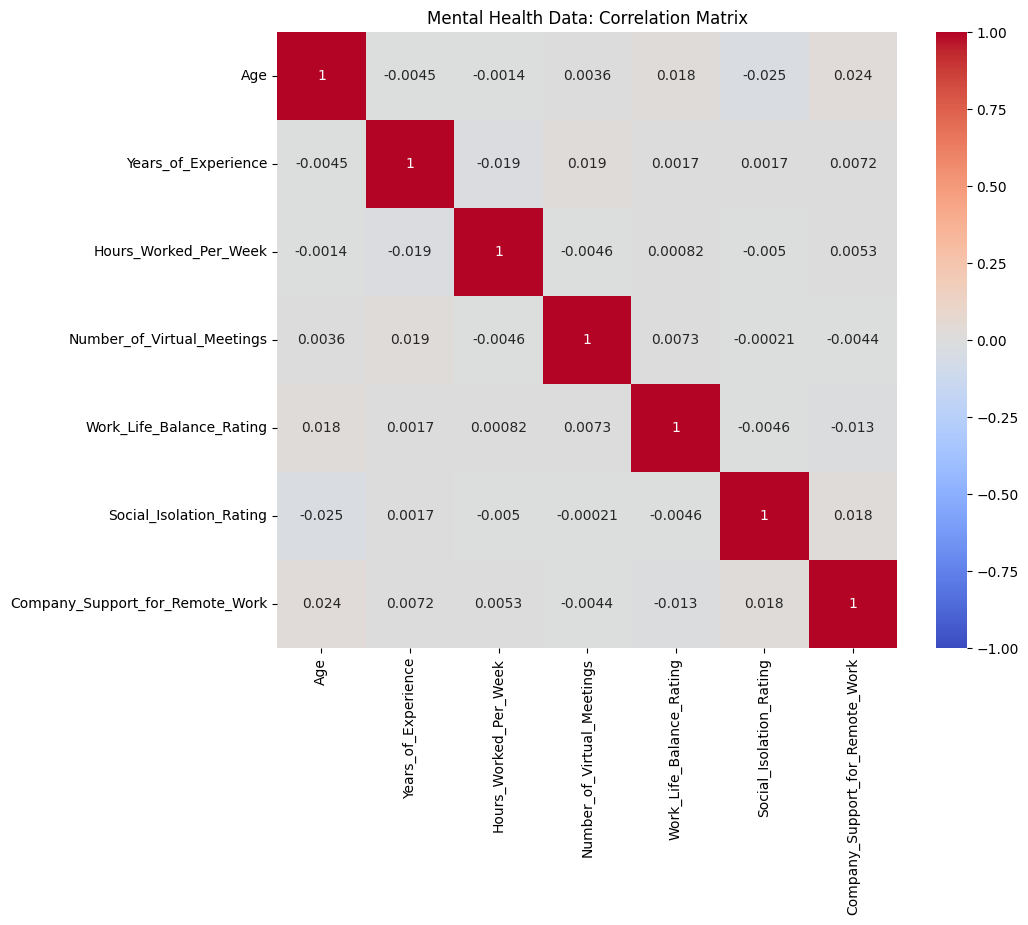

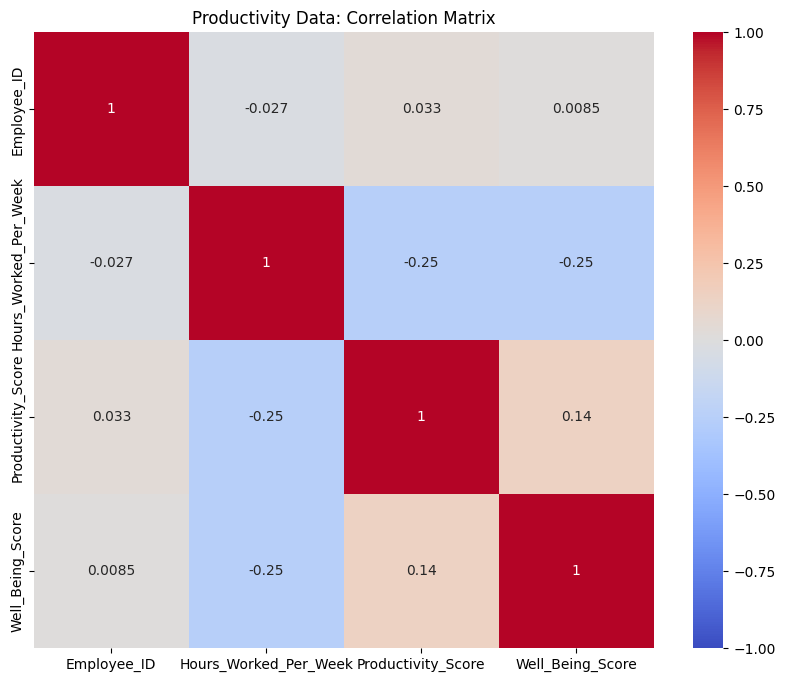

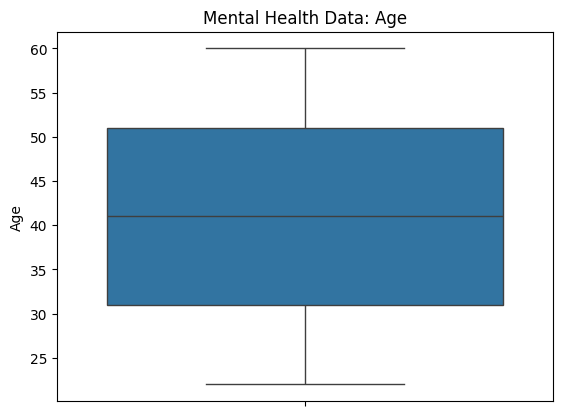

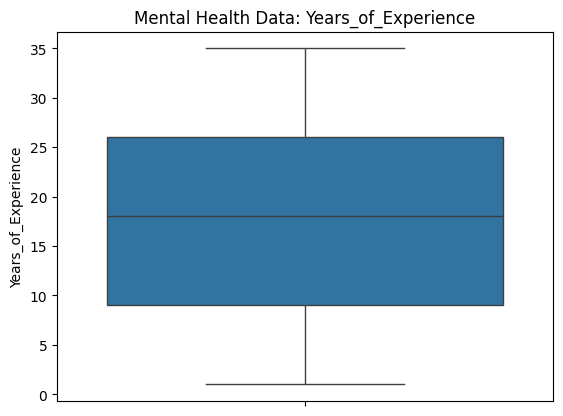

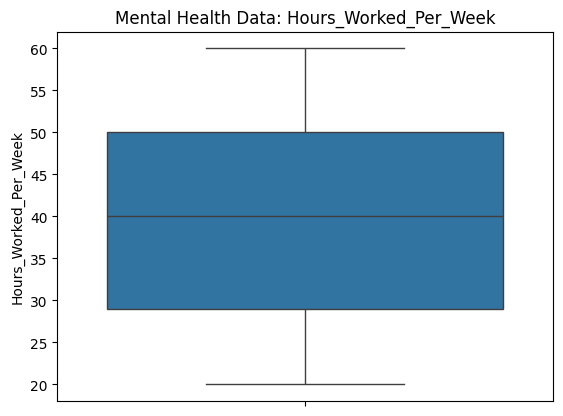

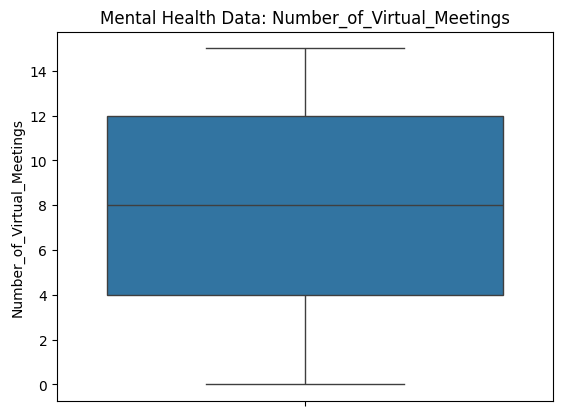

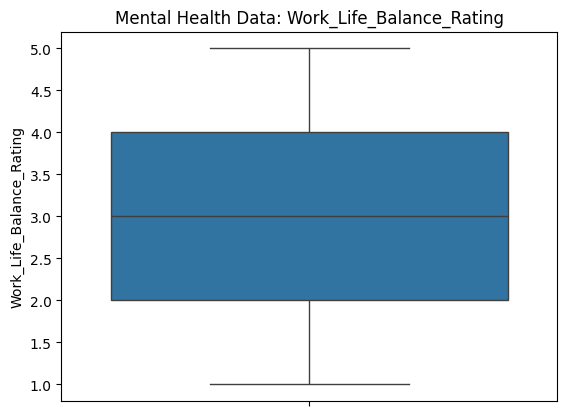

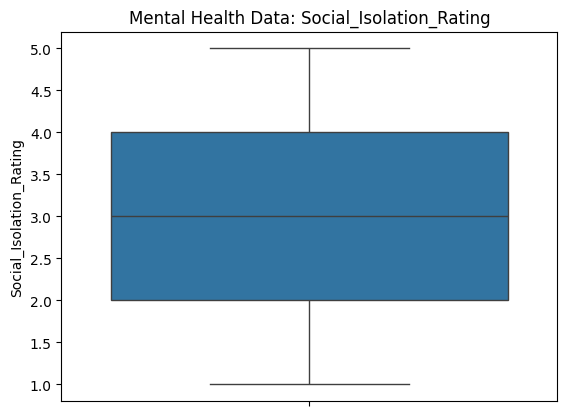

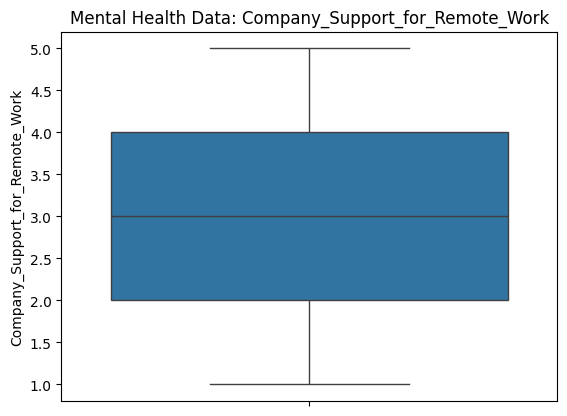

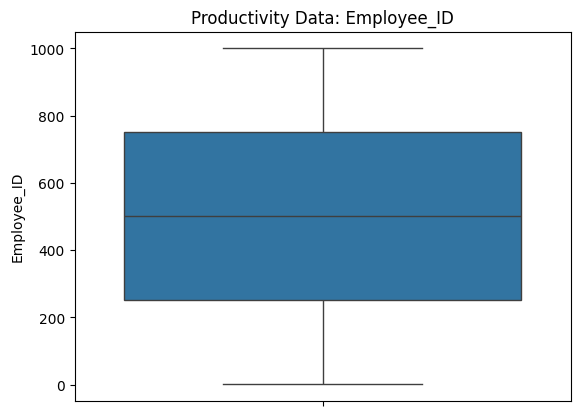

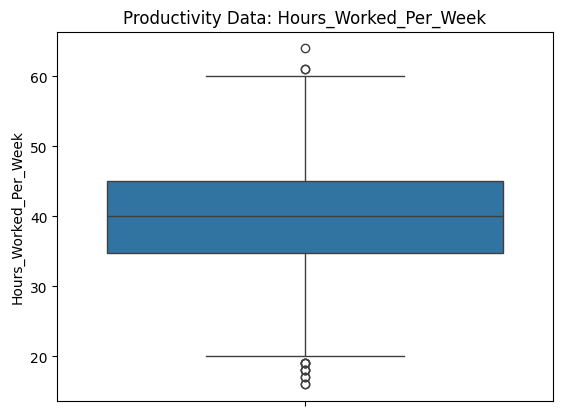

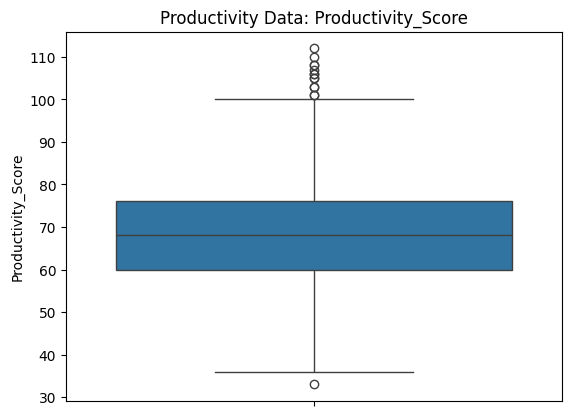

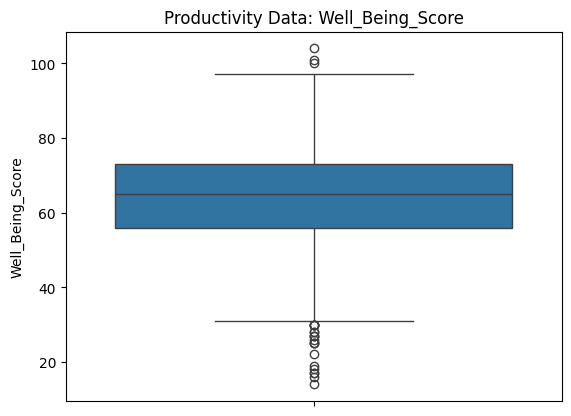

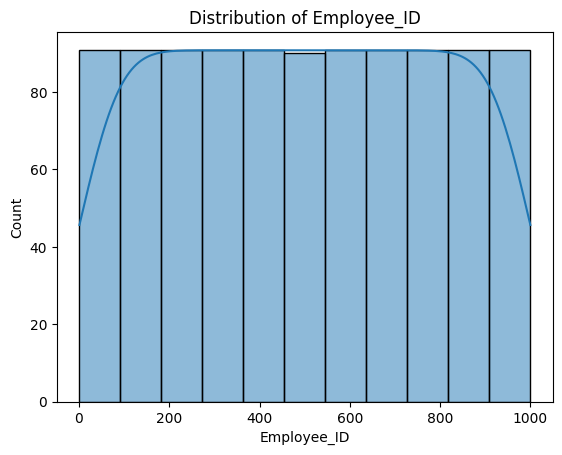

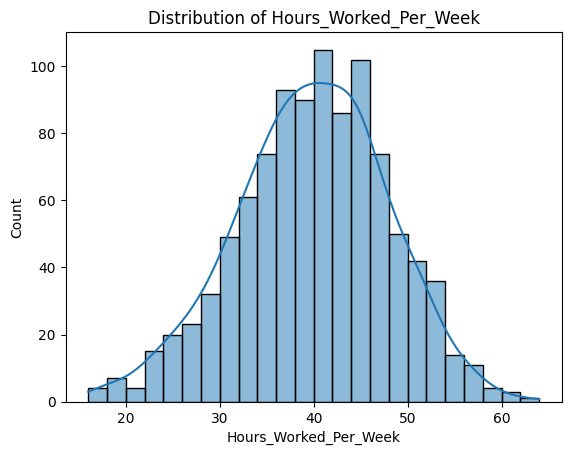

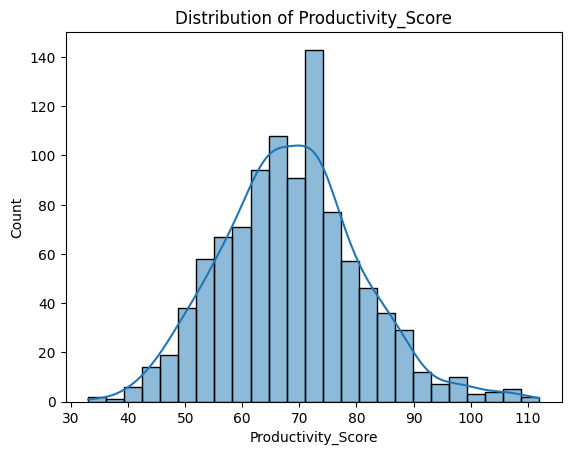

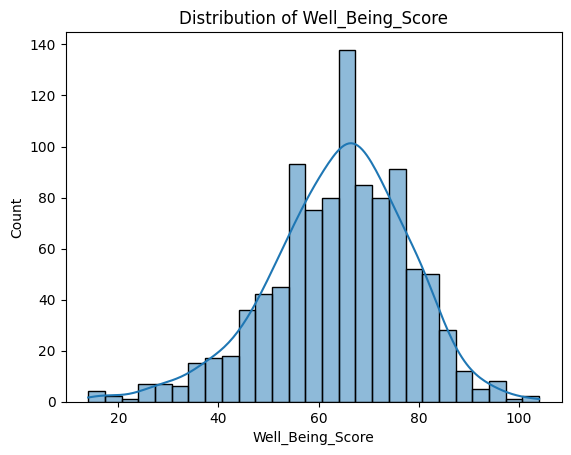

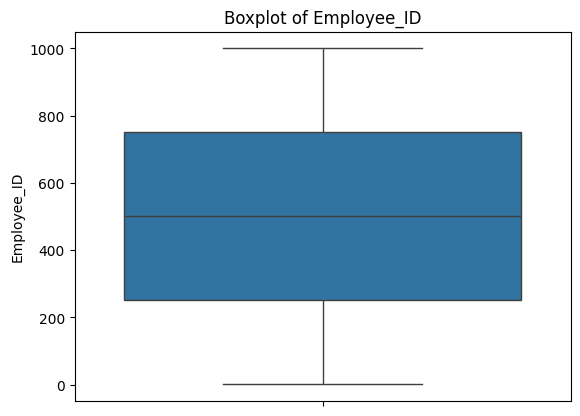

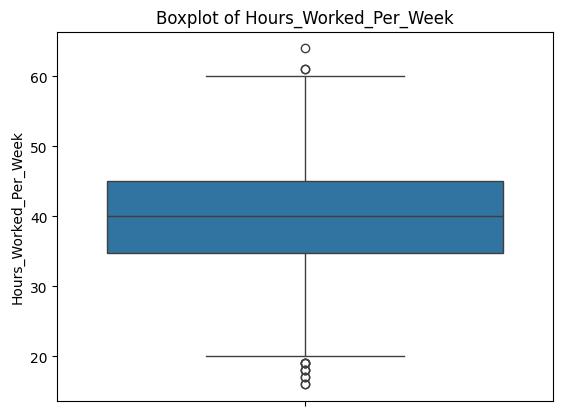

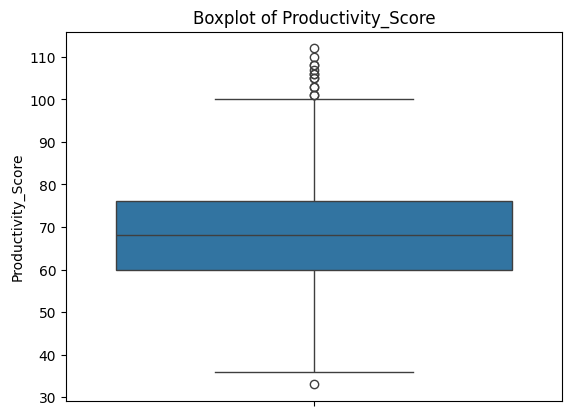

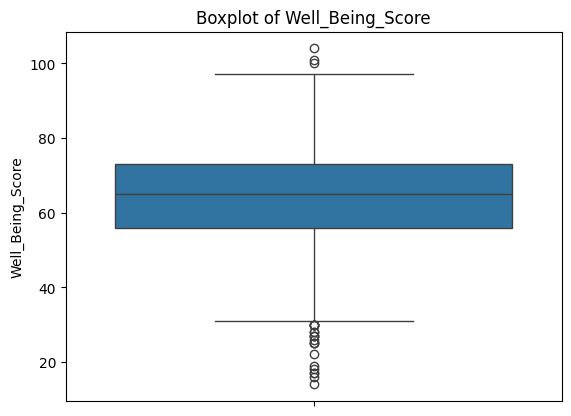

Employee_ID              0
Employment_Type          0
Hours_Worked_Per_Week    0
Productivity_Score       0
Well_Being_Score         0
dtype: int64
Missing values in Mental Health Data:
Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region          

In [72]:

# Load data
data = pd.read_csv(r"C:\Users\simra\OneDrive - University of Cincinnati\UC\Data Tech Analytics\remote-work-productivity_exported.csv")
mental_health_data = pd.read_csv(r"C:\Users\simra\.cache\kagglehub\datasets\waqi786\remote-work-and-mental-health\versions\1\Impact_of_Remote_Work_on_Mental_Health.csv")
productivity_data = pd.read_csv(r"C:\Users\simra\.cache\kagglehub\datasets\mrsimple07\remote-work-productivity\versions\1\remote_work_productivity.csv")


# View basic information about the datasets
print("Mental Health Data Overview:")
print(mental_health_data.info())
print(mental_health_data.head())

print("\nProductivity Data Overview:")
print(productivity_data.info())
print(productivity_data.head())
print(data.describe())

# Plot distributions of numeric variables
# Correlation matrix and heatmap for mental health data
numeric_mental_health_data = mental_health_data.select_dtypes(include=['float', 'int'])
mental_corr = numeric_mental_health_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(mental_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Mental Health Data: Correlation Matrix")
plt.show()

# Correlation matrix and heatmap for productivity data
numeric_productivity_data = productivity_data.select_dtypes(include=['float', 'int'])
prod_corr = numeric_productivity_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(prod_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Productivity Data: Correlation Matrix")
plt.show()

# Plot boxplots to detect outliers in both datasets
for column in mental_health_data.select_dtypes(include=['float', 'int']):
    sns.boxplot(mental_health_data[column])
    plt.title(f'Mental Health Data: {column}')
    plt.show()

for column in productivity_data.select_dtypes(include=['float', 'int']):
    sns.boxplot(productivity_data[column])
    plt.title(f'Productivity Data: {column}')
    plt.show()

# Plot distributions
for column in data.select_dtypes(include=['float', 'int']):
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()
## detect outliers
for column in data.select_dtypes(include=['float', 'int']):
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

 # Check for missing values
print(data.isnull().sum())

print("Missing values in Mental Health Data:")
print(mental_health_data.isnull().sum())

print("\nMissing values in Productivity Data:")
print(productivity_data.isnull().sum())

# Check and remove duplicate rows
duplicates = data.duplicated()
print(f'Total duplicate rows: {duplicates.sum()}')

print(f"Mental Health Data Duplicates: {mental_health_data.duplicated().sum()}")
print(f"Productivity Data Duplicates: {productivity_data.duplicated().sum()}")

mental_health_data = mental_health_data.drop_duplicates()
productivity_data = productivity_data.drop_duplicates()


data_cleaned = data.drop_duplicates()

# Check data types
print(data.dtypes)






Written explanation of data Cleaning: 

This cleaning process shows the different outliers in each coloumn along with providing visualizations to help the audience undertsand it better. I also included the missing values, duplicate values and the different datatypes in the cleaning process. From the misisng values you can tell that each coloumn does no have misisng values in the csv file and that there are no duplicates. From the datat types, it is clear that each coloumn has the right data type and is accurate. 

Written explanation of visualizations: 

I use the 4 visualizations to showcase the outliers in a different format so that you can see the consisency with it. I used boxplots and histograms as my two libraries. The boxplots were for the outliers, as you can see in the well being store there are many outliers above and below from the average. For productive score there is an outlier below the average of the productivity score. The histograms and bar graphs are used to just see the linear realtionship of the hours work and how it affect the mental acitvity of the employees. I used heatmaps also to find the flow of the mental health of each employee and to show the correlation of each aspect such as hours worked, mental health and productive and how it affects the overall total. 

Exploratory Data Analysis (EDA)

- some insights i can find from hese datasets is how each colomun has either a negative or positive impact to productivity and mental health. These visualizations i chose can show each relationship and make it easier to understand the datasets
- the variables such as hour worked, productivity scores, and mental health are normally distributed and have an either positive or negative realtionship.These variables can help show how each employee is with working at home or at the office and how they have improved from it or decreased their health.  
- the correlations at this stage are just seeing how each variable can affect the productivity of companies. At this point the relationship between each data is very important to understand what this data is trying to show
- so far i dont see any data issues or data types that need to be converted 



Machine Learning Plan:

We haven't actually worked on the machine learning module yet, that isn't until next week but I hope to use linear regression to predict outcomes from my data. I also want to use clustering to group the eomplyees that are similar together so they can have someone to talk to. 

- The type of machine learning model I want to use is supervised learning models because they use regrssion models which will let me predicit productivity. 
- Some issues that i have identified with using the supervised learning model is protecting health records, Outliers in the data, creating valuable features from the data. 
- Some ways I can address these challenges is by using z-score/interguatile range to hand any outliers, make any senstive data anonymous, and conduct eda to identify to stronger values in the data. 


Machine Learning Implementation Process: Steps and Details 
1. Ask 
2. Prepare (EDA)
3. Process (Train and Test)
4. Analyze (Testing Algorithms)
5. Evaluate (Assess Models )
6. Share 



1. Ask 

Question: How does Remote Work impact productivity and mental health?

Outcomes: Predict productivity scores and the health risks. 


Mental Health Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 

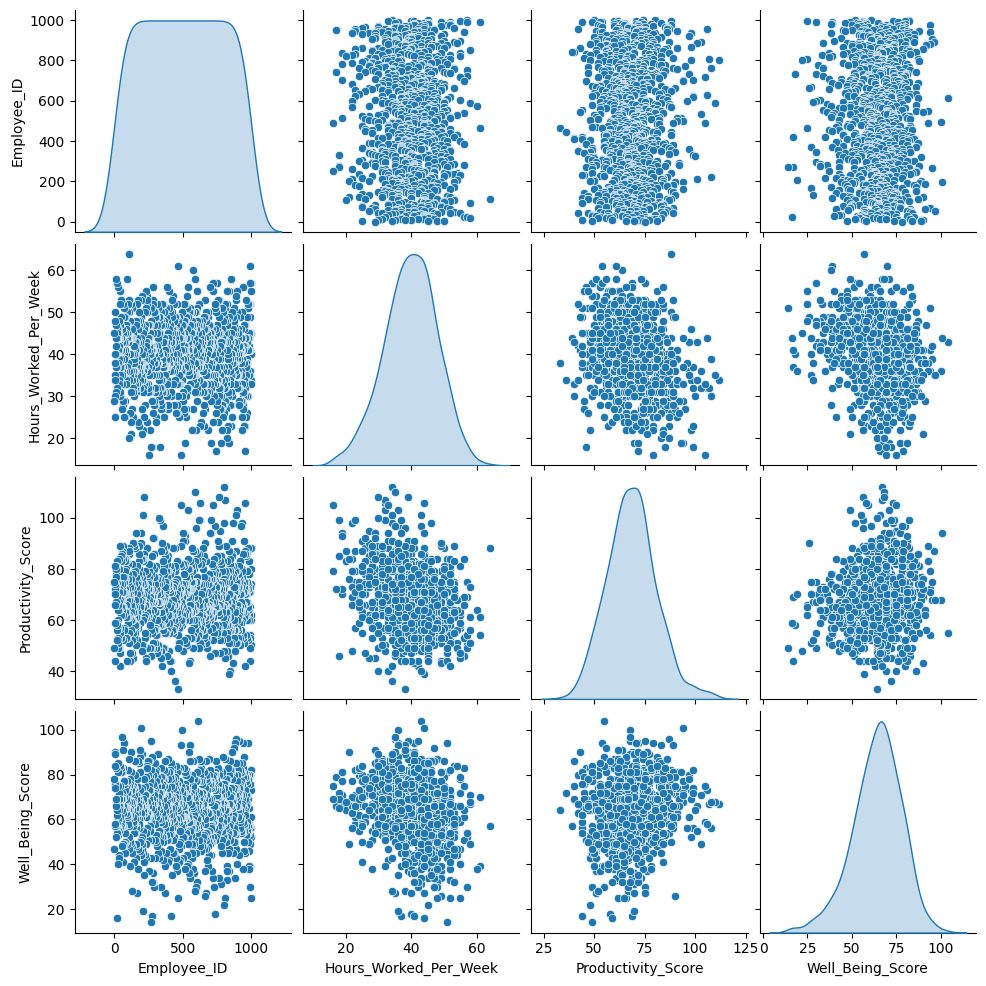

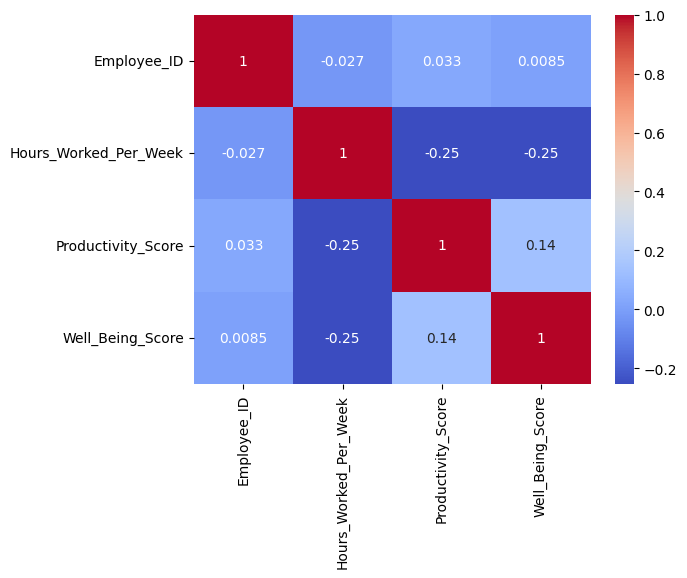

In [73]:
## 2. Prepare (EDA)
## Use visualizations to explore the data and identify patterns and relationships between variables.
print("Mental Health Data Overview:")
print(mental_health_data.info())
print(mental_health_data.head())
print(mental_health_data.describe())
print("Productivity Data Overview:")
print(productivity_data.info())
print(productivity_data.head())
print(productivity_data.describe())
print("Work Productivity Data Overview:")
print(data_cleaned.info())
print(data_cleaned.head())
print(data_cleaned.describe())

# Select only numeric columns for pairplot
numeric_data = data_cleaned.select_dtypes(include=['float', 'int'])
sns.pairplot(numeric_data, diag_kind='kde')
plt.show()

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [74]:
# 3.Process (Train and Test)
# Prepare the data for training and testing the model.
X = data_cleaned.drop(columns=["Productivity_Score"])
y = data_cleaned["Productivity_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer
numeric_features = X.select_dtypes(include=['float', 'int']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the transformations to the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [75]:
#4. Analyze (Testing Algorithms)
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Random Forest Accuracy: 0.03
SVM Accuracy: 0.04


In [76]:


#5. Evaluate (Model Evaluation)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
print("Precision:", precision)

# Select the best model based on accuracy scores
best_model_name = max(models, key=lambda name: accuracy_score(y_test, models[name].predict(X_test)))
best_model = models[best_model_name]

y_pred = best_model.predict(X_test)
print(f"Best Model: {best_model_name}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.009816849816849816
Best Model: SVM
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
              precision    recall  f1-score   support

          40       0.00      0.00      0.00         2
          43       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         2
          45       0.00      0.00      0.00         2
          46       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         2
          49       0.00      0.00      0.00         2
          50       0.00      0.00      0.00         2
          51       0.00      0.00      0.00         4
          53       0.00      0.00      0.00         4
          54       0.00      0.00      0.00         2
          55       0.00      0.00      0.00         2
          56       0.00      0.00      0.00         4
          57       0.00      0.00

c:\Users\simra\.virtualenvs\final-project-simdod--y3rbrFR\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\simra\.virtualenvs\final-project-simdod--y3rbrFR\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\simra\.virtualenvs\final-project-simdod--y3rbrFR\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

6. Share 

I chose to use the supervised machine learning model becuase it helps me to go more into depth with my data and is more benifical for proving productivity using the different regression models 

 Prior Feedback and Updates

What feedback did you receive from your peers and/or the teaching team?

    Some feedback i got was to go more into detail with my visuals so i added a few more visuals and the correlation they have to remote work and productivity. 

What changes have you made to your project based on this feedback?

    I've manly been adding on to what i would change with the datset and how i would program it to make it easy to understand but also valuable. My goal for this data is to answer the question on how remote work is more productivie and better for mental health than in person work is. 



## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [77]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 14197 bytes to source.py
